Decison Tree Income Prediction.


Aim -  Build the Predictive Model.. Target variale is income and labels are <=50K and >50K.

1) Clean data,
2) Build tree with default hyperparameters,
3) Figure out all the possible hyperparameters.
4) Choose the optimal hyperparameters.


In [43]:
# importing required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df=pd.read_csv("adult_dataset.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [45]:
df.info()   ## 32561 rows AND 15 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [46]:
# We have so many columns with additional characters "?"
# Removing rows with from workclass.
df = df[df.workclass !="?"]
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [47]:
df_cat = df.select_dtypes(include="object").columns

In [48]:
df.select_dtypes(include=["int64"]).columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [49]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [50]:
df.select_dtypes(include="object").apply(lambda x:x=="?").sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [51]:
df = df[df["occupation"] !="?"]
df = df[df["native.country"] !="?"]

In [52]:
df.describe()
# All that is not required in decision trees, since they can process categorical variables easily. 
# However, we still need to encode the categorical variables into a standard format so that sklearn 
# can understand them and build the tree. We'll do that using the LabelEncoder() class, 
# which comes with sklearn.preprocessing. 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[df_cat] = df[df_cat].apply(le.fit_transform)
df.head()
df["income"] = df["income"].astype("category")

# Model Building and evaluation.

In [53]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [54]:
# putting features on X and Y
X=df.drop("income",axis=1)
Y=df["income"]

In [55]:
# splitting the data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=10)


In [56]:
# Importing Decision tree classifier.
from sklearn.tree import DecisionTreeClassifier

In [57]:
model = DecisionTreeClassifier(max_depth=5)

In [58]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
# lets check the evaluation metric of our model.
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [62]:
y_predict = model.predict(X_test)
print(classification_report(Y_test,y_predict))
print("\n -- Confusion Matrix is \n")
print(confusion_matrix(Y_test,y_predict))
print("\n -- Accuracy \n")
print(accuracy_score(Y_test,y_predict))

             precision    recall  f1-score   support

          0       0.86      0.95      0.90      6823
          1       0.78      0.51      0.62      2226

avg / total       0.84      0.84      0.83      9049


 -- Confusion Matrix is 

[[6493  330]
 [1089 1137]]

 -- Accuracy 

0.8431870924964084


# Tuning


The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 
First, let's understand the parameters in a decision tree. You can read this in the documentation using help(DecisionTreeClassifier).
criterion (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
If an integer is inputted then it considers that value as max features at each split.
If float value is taken then it shows the percentage of features at each split.
If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
If “log2” is taken then max_features= log2(n_features).
If None, then max_features=n_features. By default, it takes “None” value.
max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

In [66]:
# tuning with depth of the tree (max_depth)

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(criterion="gini",
                                   random_state=22)

tree = GridSearchCV(estimator=tree_model,param_grid={"max_depth":range(1,40)},
                   cv=5,
                   scoring="accuracy",verbose=1)

tree.fit(X_train,Y_train)


Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   20.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=22,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)

In [76]:
# Results.
depth_tune_results=tree.cv_results_
depth_tune_results=pd.DataFrame(depth_tune_results)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing

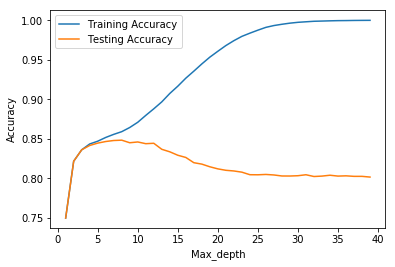

In [77]:
# plotting and train score and test score by Max_depths

plt.plot(depth_tune_results.param_max_depth,depth_tune_results.mean_train_score,label="Training Accuracy")
plt.plot(depth_tune_results.param_max_depth,depth_tune_results.mean_test_score,label="Testing Accuracy")
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# print(depth_tune_results.loc[:,["param_max_depth","mean_train_score","mean_test_score"]])

Observed that till depth 10, accuracy for both train and test seems fine.After 10 accuracy on test data decreases drastically.

# Tuning on min_sample_leaf


In [84]:
# Considering initial min sample at leaf is 5 and till 100 by jump of 5.

tree_model=DecisionTreeClassifier(criterion="gini",random_state=23)
tree = GridSearchCV(tree_model, param_grid={"min_samples_leaf":range(5,101,5)}, 
                    cv=5, 
                   scoring="accuracy")
tree.fit(X_train, Y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=23,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 101, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [85]:
leaf_results=pd.DataFrame(tree.cv_results_)
leaf_results.head()

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.115529,0.003400,0.821532,0.912957,5,{'min_samples_leaf': 5},20,0.819839,0.915033,0.826664,...,0.823780,0.912794,0.818333,0.913031,0.819043,0.911314,0.012886,0.00049,0.003184,0.001197
1,0.100737,0.002799,0.830768,0.886859,10,{'min_samples_leaf': 10},19,0.829309,0.883771,0.827374,...,0.828991,0.888876,0.835149,0.889172,0.833018,0.886744,0.004746,0.00040,0.002866,0.002012
2,0.095941,0.002399,0.836736,0.877066,15,{'min_samples_leaf': 15},18,0.835227,0.875718,0.830452,...,0.838939,0.879344,0.843439,0.879226,0.835623,0.876088,0.004513,0.00049,0.004308,0.001848
3,0.091144,0.002599,0.841567,0.872353,20,{'min_samples_leaf': 20},17,0.838778,0.871336,0.841582,...,0.842255,0.874845,0.846518,0.874549,0.838702,0.870582,0.004017,0.00049,0.002863,0.001939
4,0.086347,0.002798,0.844077,0.868304,25,{'min_samples_leaf': 25},16,0.845170,0.867902,0.844187,...,0.846755,0.868747,0.843202,0.872240,0.841071,0.866319,0.001497,0.00040,0.001907,0.002180


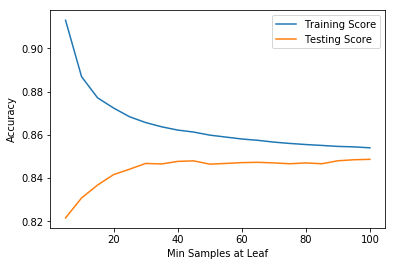

In [87]:
# plotting te results.

plt.plot(leaf_results.param_min_samples_leaf,leaf_results.mean_train_score,label="Training Score")
plt.plot(leaf_results.param_min_samples_leaf,leaf_results.mean_test_score,label="Testing Score")
plt.xlabel("Min Samples at Leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [88]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [89]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.067359,0.002799,0.843509,0.844491,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",13,...,0.838939,0.844473,0.848413,0.847907,0.839176,0.844414,0.007600,1.165689e-03,0.003804,0.001856
1,0.055166,0.001999,0.843509,0.844491,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",13,...,0.838939,0.844473,0.848413,0.847907,0.839176,0.844414,0.002992,3.504023e-07,0.003804,0.001856
2,0.053568,0.002199,0.843272,0.844468,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.838939,0.844473,0.848413,0.847907,0.837991,0.844296,0.003260,3.998757e-04,0.004092,0.001858
3,0.052367,0.002398,0.843272,0.844468,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.838939,0.844473,0.848413,0.847907,0.837991,0.844296,0.001354,7.995849e-04,0.004092,0.001858
4,0.091544,0.002399,0.844551,0.853893,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",9,...,0.842255,0.854420,0.838465,0.853295,0.841071,0.854952,0.007520,4.901353e-04,0.005503,0.001811
5,0.086946,0.002200,0.844551,0.853893,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",9,...,0.842255,0.854420,0.838465,0.853295,0.841071,0.854952,0.001094,3.996850e-04,0.005503,0.001811
6,0.083349,0.002200,0.846445,0.851821,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.842492,0.852643,0.844150,0.853058,0.845334,0.852051,0.003495,3.999499e-04,0.003471,0.001084
7,0.081350,0.002199,0.846445,0.851821,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.842492,0.852643,0.844150,0.853058,0.845334,0.852051,0.002057,3.996373e-04,0.003471,0.001084
8,0.043175,0.001997,0.844788,0.845640,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",7,...,0.844623,0.849802,0.849597,0.848499,0.839176,0.844414,0.002134,9.887906e-07,0.003327,0.002963
9,0.044173,0.001800,0.844788,0.845640,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",7,...,0.844623,0.849802,0.849597,0.848499,0.839176,0.844414,0.004912,3.996139e-04,0.003327,0.002963


In [90]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8471084166153555
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [92]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [95]:
# accuracy score
clf_gini.score(X_test,Y_test)

0.8520278483810366

In [96]:
y_pred = clf_gini.predict(X_test)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.94      0.91      6823
          1       0.76      0.58      0.66      2226

avg / total       0.85      0.85      0.84      9049

